# Practice Lab: Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

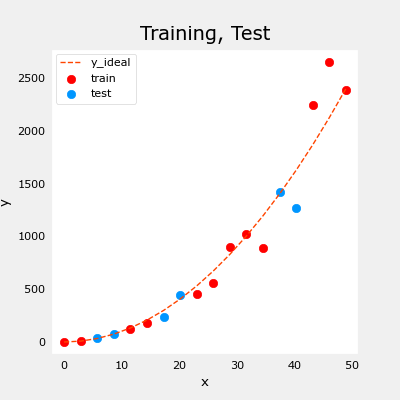

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [4]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        
        
    ### START CODE HERE ### 
    
        err_i = ( (yhat[i] - y[i])**2 ) 
        err += err_i                                                                
    err = err / (2*m)   
    
    ### END CODE HERE ### 
    
    return(err)

In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST

test_eval_mse(eval_mse)  

# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

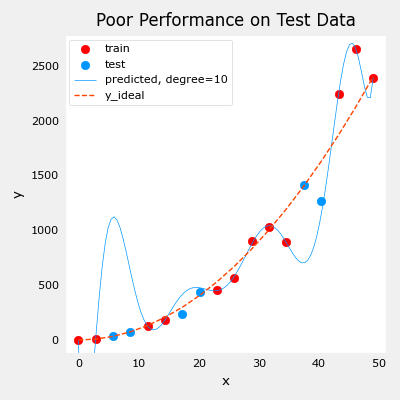

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

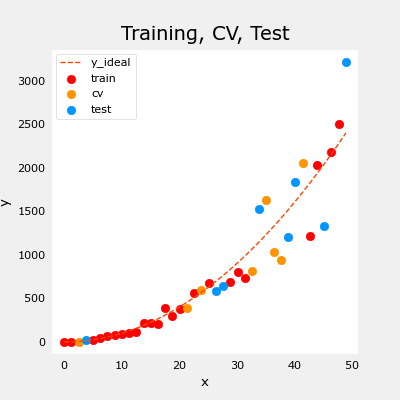

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

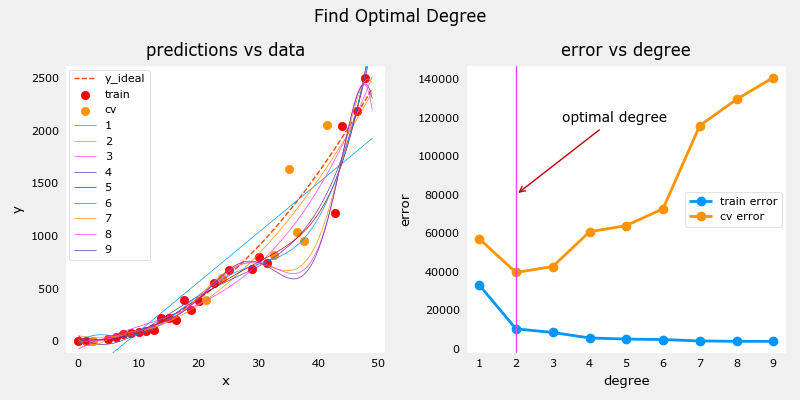

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

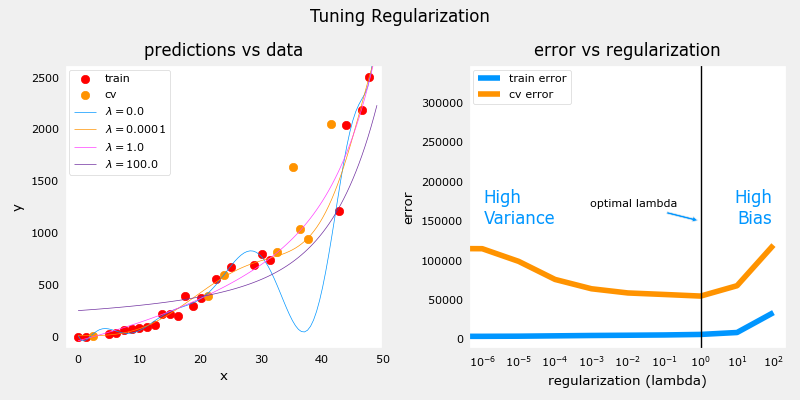

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

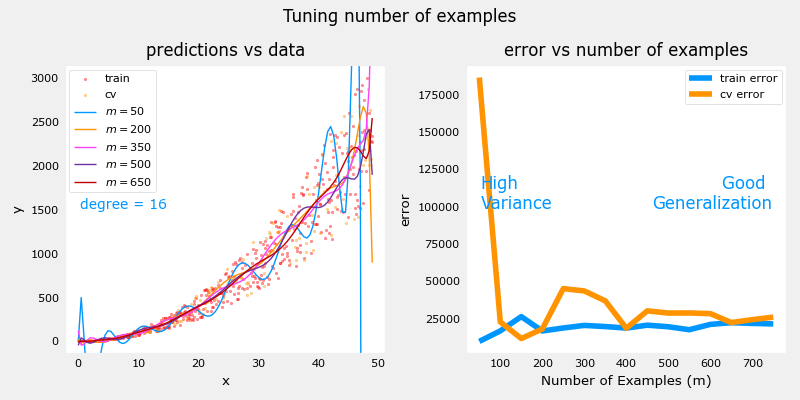

In [15]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [16]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


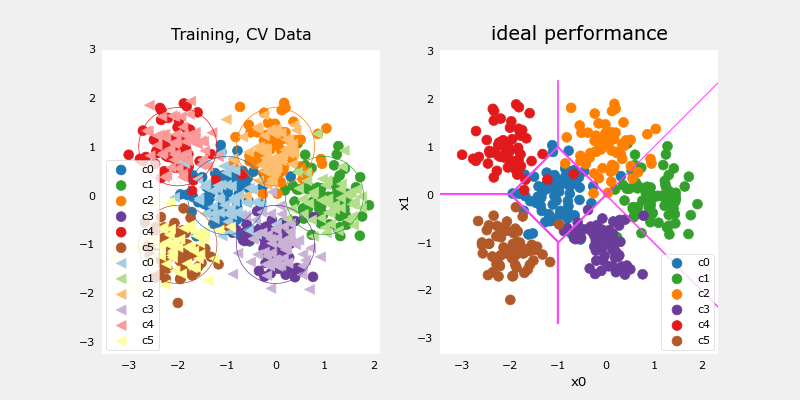

In [17]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [20]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
        
            if yhat[i] != y[i]:
                incorrect += 1     
    cerr = incorrect/m
        
        
    ### END CODE HERE ### 
    
    return(cerr)

In [21]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [25]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
       
        Dense(120, activation = 'relu', name = "L1"),  
        
        Dense(40, activation = 'relu', name = "L2"),  
        
        Dense(classes, activation = 'linear', name = "L3")  
  
        
        
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    
    ### START CODE HERE ### 
    
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    
    optimizer = tf.keras.optimizers.Adam(0.01),
    
    ### END CODE HERE ### 
)

In [26]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.0855
Epoch 2/1000
13/13 [==============================] - 0s 487us/step - loss: 0.4295
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 4/1000
13/13 [==============================] - 0s 921us/step - loss: 0.2788
Epoch 5/1000
13/13 [==============================] - 0s 892us/step - loss: 0.2851
Epoch 6/1000
13/13 [==============================] - 0s 549us/step - loss: 0.3046
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2382
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2271
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2216
Epoch 10/1000
13/13 [==============================] - 0s 968us/step - loss: 0.1965
Epoch 11/1000
13/13 [==============================] - 0s 321us/step - loss: 0.2150
Epoch 12/1000
13/13 [==============================] - 0s 611us/step - loss: 0.2022
Epoch 13/10

13/13 [==============================] - 0s 316us/step - loss: 0.1772
Epoch 100/1000
13/13 [==============================] - 0s 543us/step - loss: 0.1667
Epoch 101/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1750
Epoch 102/1000
13/13 [==============================] - 0s 905us/step - loss: 0.1645
Epoch 103/1000
13/13 [==============================] - 0s 872us/step - loss: 0.1897
Epoch 104/1000
13/13 [==============================] - 0s 338us/step - loss: 0.1605
Epoch 105/1000
13/13 [==============================] - 0s 534us/step - loss: 0.1462
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1507
Epoch 107/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1651
Epoch 108/1000
13/13 [==============================] - 0s 269us/step - loss: 0.1609
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1533
Epoch 110/1000
13/13 [==============================] - 0s 514us/step - loss: 0.1416
E

13/13 [==============================] - 0s 918us/step - loss: 0.1092
Epoch 197/1000
13/13 [==============================] - 0s 730us/step - loss: 0.1208
Epoch 198/1000
13/13 [==============================] - 0s 525us/step - loss: 0.1294
Epoch 199/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1173
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1128
Epoch 201/1000
13/13 [==============================] - 0s 789us/step - loss: 0.1025
Epoch 202/1000
13/13 [==============================] - 0s 416us/step - loss: 0.1018
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0963
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1072
Epoch 205/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1039
Epoch 206/1000
13/13 [==============================] - 0s 134us/step - loss: 0.1145
Epoch 207/1000
13/13 [==============================] - 0s 589us/step - loss: 0.1542
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.1038
Epoch 294/1000
13/13 [==============================] - 0s 942us/step - loss: 0.0904
Epoch 295/1000
13/13 [==============================] - 0s 428us/step - loss: 0.0956
Epoch 296/1000
13/13 [==============================] - 0s 459us/step - loss: 0.0919
Epoch 297/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 299/1000
13/13 [==============================] - 0s 960us/step - loss: 0.0723
Epoch 300/1000
13/13 [==============================] - 0s 402us/step - loss: 0.0713
Epoch 301/1000
13/13 [==============================] - 0s 647us/step - loss: 0.0669
Epoch 302/1000
13/13 [==============================] - 0s 619us/step - loss: 0.0789
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0982
Epoch 304/1000
13/13 [==============================] - 0s 792us/step - loss: 0.0797
Epo

13/13 [==============================] - 0s 893us/step - loss: 0.1002
Epoch 391/1000
13/13 [==============================] - 0s 960us/step - loss: 0.0931
Epoch 392/1000
13/13 [==============================] - 0s 272us/step - loss: 0.0669
Epoch 393/1000
13/13 [==============================] - 0s 373us/step - loss: 0.0766
Epoch 394/1000
13/13 [==============================] - 0s 631us/step - loss: 0.0874
Epoch 395/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0744
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0698
Epoch 397/1000
13/13 [==============================] - 0s 833us/step - loss: 0.0582
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0603
Epoch 399/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0587
Epoch 400/1000
13/13 [==============================] - 0s 565us/step - loss: 0.0699
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1068
Epo

13/13 [==============================] - 0s 387us/step - loss: 0.0728
Epoch 488/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0766
Epoch 490/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 491/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 492/1000
13/13 [==============================] - 0s 921us/step - loss: 0.0730
Epoch 493/1000
13/13 [==============================] - 0s 336us/step - loss: 0.0576
Epoch 494/1000
13/13 [==============================] - 0s 699us/step - loss: 0.0521
Epoch 495/1000
13/13 [==============================] - 0s 660us/step - loss: 0.0529
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 497/1000
13/13 [==============================] - 0s 792us/step - loss: 0.0453
Epoch 498/1000
13/13 [==============================] - 0s 615us/step - loss: 0.0412
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 585/1000
13/13 [==============================] - 0s 973us/step - loss: 0.0385
Epoch 586/1000
13/13 [==============================] - 0s 655us/step - loss: 0.0383
Epoch 587/1000
13/13 [==============================] - 0s 853us/step - loss: 0.0389
Epoch 588/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 589/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 590/1000
13/13 [==============================] - 0s 865us/step - loss: 0.0412
Epoch 591/1000
13/13 [==============================] - 0s 273us/step - loss: 0.0469
Epoch 592/1000
13/13 [==============================] - 0s 508us/step - loss: 0.0438
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0495
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0511
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 5

13/13 [==============================] - 0s 833us/step - loss: 0.0407
Epoch 682/1000
13/13 [==============================] - 0s 495us/step - loss: 0.0413
Epoch 683/1000
13/13 [==============================] - 0s 648us/step - loss: 0.0345
Epoch 684/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 685/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 686/1000
13/13 [==============================] - 0s 731us/step - loss: 0.0276
Epoch 687/1000
13/13 [==============================] - 0s 195us/step - loss: 0.0404
Epoch 688/1000
13/13 [==============================] - 0s 289us/step - loss: 0.0454
Epoch 689/1000
13/13 [==============================] - 0s 482us/step - loss: 0.0283
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0285
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 692/1000
13/13 [==============================] - 0s 950us/step - loss: 0.0256
Epo

13/13 [==============================] - 0s 187us/step - loss: 0.0262
Epoch 779/1000
13/13 [==============================] - 0s 440us/step - loss: 0.0349
Epoch 780/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0297
Epoch 781/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 782/1000
13/13 [==============================] - 0s 793us/step - loss: 0.0332
Epoch 783/1000
13/13 [==============================] - 0s 232us/step - loss: 0.0407
Epoch 784/1000
13/13 [==============================] - 0s 528us/step - loss: 0.0267
Epoch 785/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 786/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 787/1000
13/13 [==============================] - 0s 990us/step - loss: 0.0267
Epoch 788/1000
13/13 [==============================] - 0s 342us/step - loss: 0.0257
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 876/1000
13/13 [==============================] - 0s 837us/step - loss: 0.0135
Epoch 877/1000
13/13 [==============================] - 0s 246us/step - loss: 0.0151
Epoch 878/1000
13/13 [==============================] - 0s 312us/step - loss: 0.0712
Epoch 879/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0845
Epoch 880/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 881/1000
13/13 [==============================] - 0s 797us/step - loss: 0.0666
Epoch 882/1000
13/13 [==============================] - 0s 226us/step - loss: 0.0577
Epoch 883/1000
13/13 [==============================] - 0s 849us/step - loss: 0.1347
Epoch 884/1000
13/13 [==============================] - 0s 962us/step - loss: 0.1529
Epoch 885/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3342
Epoch 886/1000
13/13 [==============================] - 0s 864us/step - loss: 0.3182
E

13/13 [==============================] - 0s 1ms/step - loss: 0.0395
Epoch 973/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0471
Epoch 974/1000
13/13 [==============================] - 0s 822us/step - loss: 0.0316
Epoch 975/1000
13/13 [==============================] - 0s 940us/step - loss: 0.0283
Epoch 976/1000
13/13 [==============================] - 0s 283us/step - loss: 0.0219
Epoch 977/1000
13/13 [==============================] - 0s 519us/step - loss: 0.0240
Epoch 978/1000
13/13 [==============================] - 0s 738us/step - loss: 0.0213
Epoch 979/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 980/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 981/1000
13/13 [==============================] - 0s 868us/step - loss: 0.0222
Epoch 982/1000
13/13 [==============================] - 0s 372us/step - loss: 0.0296
Epoch 983/1000
13/13 [==============================] - 0s 551us/step - loss: 0.0217
Epo

In [27]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 1s 536us/step


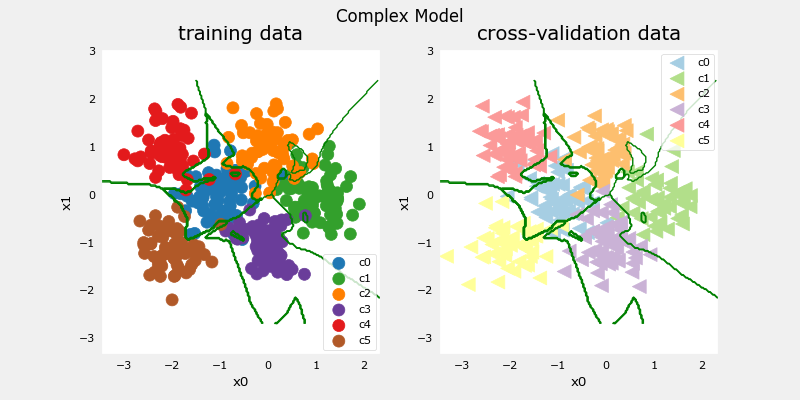

In [28]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [29]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 871us/step
categorization error, training, complex model: 0.003
categorization error, cv,       complex model: 0.097


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [30]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
      
        Dense(6, activation = 'relu', name="L1"),            
        Dense(classes, activation = 'linear', name="L2")     
        
        
        
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     
    optimizer = tf.keras.optimizers.Adam(0.01),
    
    
    ### START CODE HERE ### 
)


In [31]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.9157
Epoch 2/1000
13/13 [==============================] - 0s 833us/step - loss: 1.6095
Epoch 3/1000
13/13 [==============================] - 0s 583us/step - loss: 1.4314
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.2569
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0770
Epoch 6/1000
13/13 [==============================] - 0s 847us/step - loss: 0.9018
Epoch 7/1000
13/13 [==============================] - 0s 316us/step - loss: 0.7655
Epoch 8/1000
13/13 [==============================] - 0s 855us/step - loss: 0.6466
Epoch 9/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.5581
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4886
Epoch 11/1000
13/13 [==============================] - 0s 916us/step - loss: 0.4338
Epoch 12/1000
13/13 [==============================] - 0s 435us/step - loss: 0.3955
Epoch 13

13/13 [==============================] - 0s 413us/step - loss: 0.1962
Epoch 100/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1987
Epoch 101/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1987
Epoch 102/1000
13/13 [==============================] - 0s 879us/step - loss: 0.2004
Epoch 103/1000
13/13 [==============================] - 0s 366us/step - loss: 0.2003
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1965
Epoch 105/1000
13/13 [==============================] - 0s 885us/step - loss: 0.1948
Epoch 106/1000
13/13 [==============================] - 0s 285us/step - loss: 0.1945
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1940
Epoch 108/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1943
Epoch 109/1000
13/13 [==============================] - 0s 244us/step - loss: 0.1957
Epoch 110/1000
13/13 [==============================] - 0s 574us/step - loss: 0.1956
Epo

13/13 [==============================] - 0s 891us/step - loss: 0.1888
Epoch 197/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1899
Epoch 198/1000
13/13 [==============================] - 0s 150us/step - loss: 0.1915
Epoch 199/1000
13/13 [==============================] - 0s 508us/step - loss: 0.1923
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1895
Epoch 201/1000
13/13 [==============================] - 0s 713us/step - loss: 0.1895
Epoch 202/1000
13/13 [==============================] - 0s 339us/step - loss: 0.1873
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1886
Epoch 204/1000
13/13 [==============================] - 0s 833us/step - loss: 0.1897
Epoch 205/1000
13/13 [==============================] - 0s 312us/step - loss: 0.1882
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 207/1000
13/13 [==============================] - 0s 918us/step - loss: 0.1874
Epo

13/13 [==============================] - 0s 638us/step - loss: 0.1849
Epoch 294/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1832
Epoch 295/1000
13/13 [==============================] - 0s 816us/step - loss: 0.1904
Epoch 296/1000
13/13 [==============================] - 0s 190us/step - loss: 0.1837
Epoch 297/1000
13/13 [==============================] - 0s 474us/step - loss: 0.1874
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 299/1000
13/13 [==============================] - 0s 791us/step - loss: 0.1840
Epoch 300/1000
13/13 [==============================] - 0s 672us/step - loss: 0.1852
Epoch 301/1000
13/13 [==============================] - 0s 886us/step - loss: 0.1850
Epoch 302/1000
13/13 [==============================] - 0s 793us/step - loss: 0.1892
Epoch 303/1000
13/13 [==============================] - 0s 469us/step - loss: 0.1834
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1893
E

13/13 [==============================] - 0s 410us/step - loss: 0.1835
Epoch 391/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1817
Epoch 392/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1815
Epoch 393/1000
13/13 [==============================] - 0s 133us/step - loss: 0.1810
Epoch 394/1000
13/13 [==============================] - 0s 582us/step - loss: 0.1812
Epoch 395/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1805
Epoch 396/1000
13/13 [==============================] - 0s 834us/step - loss: 0.1838
Epoch 397/1000
13/13 [==============================] - 0s 315us/step - loss: 0.1850
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 399/1000
13/13 [==============================] - 0s 960us/step - loss: 0.1828
Epoch 400/1000
13/13 [==============================] - 0s 373us/step - loss: 0.1839
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1825
Epo

13/13 [==============================] - 0s 792us/step - loss: 0.1808
Epoch 488/1000
13/13 [==============================] - 0s 341us/step - loss: 0.1813
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 490/1000
13/13 [==============================] - 0s 980us/step - loss: 0.1836
Epoch 491/1000
13/13 [==============================] - 0s 89us/step - loss: 0.1816
Epoch 492/1000
13/13 [==============================] - 0s 299us/step - loss: 0.1801
Epoch 493/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 494/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1807
Epoch 495/1000
13/13 [==============================] - 0s 410us/step - loss: 0.1799
Epoch 496/1000
13/13 [==============================] - 0s 573us/step - loss: 0.1829
Epoch 497/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1788
Epoch 498/1000
13/13 [==============================] - 0s 144us/step - loss: 0.1792


13/13 [==============================] - 0s 513us/step - loss: 0.1788
Epoch 585/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 586/1000
13/13 [==============================] - 0s 844us/step - loss: 0.1781
Epoch 587/1000
13/13 [==============================] - 0s 846us/step - loss: 0.1789
Epoch 588/1000
13/13 [==============================] - 0s 777us/step - loss: 0.1777
Epoch 589/1000
13/13 [==============================] - 0s 703us/step - loss: 0.1774
Epoch 590/1000
13/13 [==============================] - 0s 342us/step - loss: 0.1820
Epoch 591/1000
13/13 [==============================] - 0s 468us/step - loss: 0.1799
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1785
Epoch 593/1000
13/13 [==============================] - 0s 230us/step - loss: 0.1798
Epoch 594/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1775
Epoch 595/1000
13/13 [==============================] - 0s 974us/step - loss: 0.1795

13/13 [==============================] - 0s 273us/step - loss: 0.1767
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 683/1000
13/13 [==============================] - 0s 994us/step - loss: 0.1794
Epoch 684/1000
13/13 [==============================] - 0s 175us/step - loss: 0.1748
Epoch 685/1000
13/13 [==============================] - 0s 694us/step - loss: 0.1780
Epoch 686/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 687/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1769
Epoch 688/1000
13/13 [==============================] - 0s 464us/step - loss: 0.1761
Epoch 689/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 690/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1761
Epoch 691/1000
13/13 [==============================] - 0s 477us/step - loss: 0.1761
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1768
Epo

13/13 [==============================] - 0s 978us/step - loss: 0.1743
Epoch 779/1000
13/13 [==============================] - 0s 331us/step - loss: 0.1766
Epoch 780/1000
13/13 [==============================] - 0s 528us/step - loss: 0.1778
Epoch 781/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 782/1000
13/13 [==============================] - 0s 112us/step - loss: 0.1752
Epoch 783/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1757
Epoch 784/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1753
Epoch 785/1000
13/13 [==============================] - 0s 37us/step - loss: 0.1755
Epoch 786/1000
13/13 [==============================] - 0s 556us/step - loss: 0.1769
Epoch 787/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 788/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1736
Epoch 789/1000
13/13 [==============================] - 0s 737us/step - loss: 0.1754
Ep

13/13 [==============================] - 0s 1ms/step - loss: 0.1734
Epoch 876/1000
13/13 [==============================] - 0s 769us/step - loss: 0.1733
Epoch 877/1000
13/13 [==============================] - 0s 626us/step - loss: 0.1743
Epoch 878/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 879/1000
13/13 [==============================] - 0s 669us/step - loss: 0.1740
Epoch 880/1000
13/13 [==============================] - 0s 488us/step - loss: 0.1739
Epoch 881/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1744
Epoch 882/1000
13/13 [==============================] - 0s 806us/step - loss: 0.1782
Epoch 883/1000
13/13 [==============================] - 0s 329us/step - loss: 0.1760
Epoch 884/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 885/1000
13/13 [==============================] - 0s 709us/step - loss: 0.1726
Epoch 886/1000
13/13 [==============================] - 0s 364us/step - loss: 0.1728
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.1717
Epoch 973/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1706
Epoch 974/1000
13/13 [==============================] - 0s 251us/step - loss: 0.1710
Epoch 975/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1733
Epoch 976/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1722
Epoch 977/1000
13/13 [==============================] - 0s 25us/step - loss: 0.1729
Epoch 978/1000
13/13 [==============================] - 0s 547us/step - loss: 0.1700
Epoch 979/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1719
Epoch 980/1000
13/13 [==============================] - 0s 795us/step - loss: 0.1711
Epoch 981/1000
13/13 [==============================] - 0s 743us/step - loss: 0.1700
Epoch 982/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1712
Epoch 983/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1717
Epoch 

In [32]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 6)                 18        
                                                                 
 L2 (Dense)                  (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 1s 445us/step


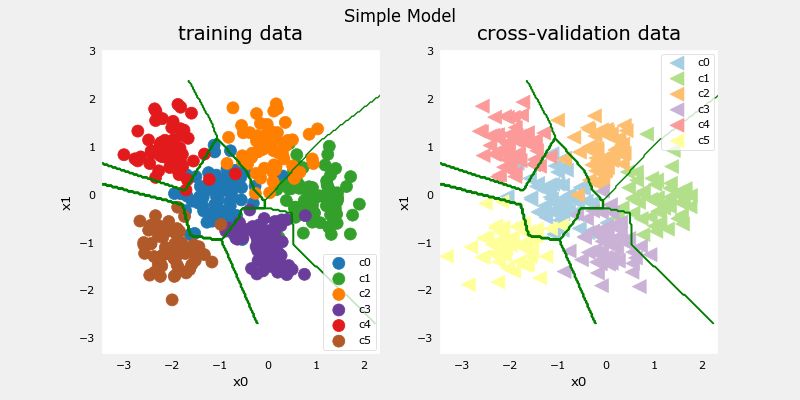

In [33]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [34]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 2ms/step
categorization error, training, simple model, 0.058, complex model: 0.003
categorization error, cv,       simple model, 0.087, complex model: 0.097


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [35]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")
        
        
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),           
    
    
    ### START CODE HERE ### 
)


In [36]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.3484
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.5570
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.2327
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0304
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9535
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9445
Epoch 7/1000
13/13 [==============================] - 0s 932us/step - loss: 0.9067
Epoch 8/1000
13/13 [==============================] - 0s 317us/step - loss: 0.8629
Epoch 9/1000
13/13 [==============================] - 0s 430us/step - loss: 0.7976
Epoch 10/1000
13/13 [==============================] - 0s 601us/step - loss: 0.7558
Epoch 11/1000
13/13 [==============================] - 0s 808us/step - loss: 0.7502
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7537
Epoch 13/1000
1

13/13 [==============================] - 0s 975us/step - loss: 0.4863
Epoch 100/1000
13/13 [==============================] - 0s 999us/step - loss: 0.4851
Epoch 101/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4768
Epoch 102/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4646
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4646
Epoch 104/1000
13/13 [==============================] - 0s 817us/step - loss: 0.4556
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4957
Epoch 106/1000
13/13 [==============================] - 0s 444us/step - loss: 0.4502
Epoch 107/1000
13/13 [==============================] - 0s 691us/step - loss: 0.4575
Epoch 108/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4735
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4577
Epoch 110/1000
13/13 [==============================] - 0s 931us/step - loss: 0.4505
Epoch 1

13/13 [==============================] - 0s 407us/step - loss: 0.3945
Epoch 197/1000
13/13 [==============================] - 0s 994us/step - loss: 0.4180
Epoch 198/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3979
Epoch 199/1000
13/13 [==============================] - 0s 957us/step - loss: 0.4033
Epoch 200/1000
13/13 [==============================] - 0s 942us/step - loss: 0.4025
Epoch 201/1000
13/13 [==============================] - 0s 522us/step - loss: 0.4258
Epoch 202/1000
13/13 [==============================] - 0s 723us/step - loss: 0.3951
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3962
Epoch 204/1000
13/13 [==============================] - 0s 780us/step - loss: 0.4066
Epoch 205/1000
13/13 [==============================] - 0s 862us/step - loss: 0.4506
Epoch 206/1000
13/13 [==============================] - 0s 329us/step - loss: 0.4306
Epoch 207/1000
13/13 [==============================] - 0s 555us/step - loss: 0.4082

13/13 [==============================] - 0s 593us/step - loss: 0.3737
Epoch 294/1000
13/13 [==============================] - 0s 859us/step - loss: 0.3983
Epoch 295/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4074
Epoch 296/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3776
Epoch 297/1000
13/13 [==============================] - 0s 227us/step - loss: 0.3878
Epoch 298/1000
13/13 [==============================] - 0s 663us/step - loss: 0.3951
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3902
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4282
Epoch 301/1000
13/13 [==============================] - 0s 843us/step - loss: 0.3930
Epoch 302/1000
13/13 [==============================] - 0s 421us/step - loss: 0.3911
Epoch 303/1000
13/13 [==============================] - 0s 676us/step - loss: 0.3886
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3732
Epo

13/13 [==============================] - 0s 929us/step - loss: 0.3534
Epoch 391/1000
13/13 [==============================] - 0s 397us/step - loss: 0.3649
Epoch 392/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3770
Epoch 393/1000
13/13 [==============================] - 0s 884us/step - loss: 0.3568
Epoch 394/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3610
Epoch 395/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 396/1000
13/13 [==============================] - 0s 937us/step - loss: 0.3814
Epoch 397/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3929
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3809
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3765
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3727
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3553
Epoch 402

13/13 [==============================] - 0s 201us/step - loss: 0.3424
Epoch 488/1000
13/13 [==============================] - 0s 410us/step - loss: 0.3499
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3363
Epoch 490/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3536
Epoch 491/1000
13/13 [==============================] - 0s 780us/step - loss: 0.3702
Epoch 492/1000
13/13 [==============================] - 0s 942us/step - loss: 0.3724
Epoch 493/1000
13/13 [==============================] - 0s 422us/step - loss: 0.3497
Epoch 494/1000
13/13 [==============================] - 0s 633us/step - loss: 0.3520
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3494
Epoch 496/1000
13/13 [==============================] - 0s 794us/step - loss: 0.3716
Epoch 497/1000
13/13 [==============================] - 0s 956us/step - loss: 0.3987
Epoch 498/1000
13/13 [==============================] - 0s 329us/step - loss: 0.3459
E

13/13 [==============================] - 0s 833us/step - loss: 0.3766
Epoch 585/1000
13/13 [==============================] - 0s 253us/step - loss: 0.3917
Epoch 586/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3610
Epoch 587/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3490
Epoch 588/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3365
Epoch 589/1000
13/13 [==============================] - 0s 794us/step - loss: 0.3305
Epoch 590/1000
13/13 [==============================] - 0s 239us/step - loss: 0.3335
Epoch 591/1000
13/13 [==============================] - 0s 462us/step - loss: 0.3476
Epoch 592/1000
13/13 [==============================] - 0s 638us/step - loss: 0.3461
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3416
Epoch 594/1000
13/13 [==============================] - 0s 818us/step - loss: 0.3396
Epoch 595/1000
13/13 [==============================] - 0s 163us/step - loss: 0.4206
E

13/13 [==============================] - 0s 516us/step - loss: 0.3776
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3578
Epoch 683/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3483
Epoch 684/1000
13/13 [==============================] - 0s 833us/step - loss: 0.3488
Epoch 685/1000
13/13 [==============================] - 0s 402us/step - loss: 0.3507
Epoch 686/1000
13/13 [==============================] - 0s 701us/step - loss: 0.3494
Epoch 687/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3452
Epoch 688/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3301
Epoch 689/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3969
Epoch 690/1000
13/13 [==============================] - 0s 976us/step - loss: 0.3691
Epoch 691/1000
13/13 [==============================] - 0s 521us/step - loss: 0.3441
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.3249
Epoch 779/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3324
Epoch 780/1000
13/13 [==============================] - 0s 782us/step - loss: 0.3456
Epoch 781/1000
13/13 [==============================] - 0s 318us/step - loss: 0.3425
Epoch 782/1000
13/13 [==============================] - 0s 806us/step - loss: 0.3248
Epoch 783/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3291
Epoch 784/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3270
Epoch 785/1000
13/13 [==============================] - 0s 813us/step - loss: 0.3285
Epoch 786/1000
13/13 [==============================] - 0s 170us/step - loss: 0.3390
Epoch 787/1000
13/13 [==============================] - 0s 603us/step - loss: 0.3641
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3471
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 7

13/13 [==============================] - 0s 1ms/step - loss: 0.3383
Epoch 876/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3343
Epoch 877/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3479
Epoch 878/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3631
Epoch 879/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3475
Epoch 880/1000
13/13 [==============================] - 0s 162us/step - loss: 0.3233
Epoch 881/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3542
Epoch 882/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3776
Epoch 883/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4490
Epoch 884/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3512
Epoch 885/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3429
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3433
Epoch 887/1

13/13 [==============================] - 0s 586us/step - loss: 0.3182
Epoch 973/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3210
Epoch 974/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3232
Epoch 975/1000
13/13 [==============================] - 0s 709us/step - loss: 0.3444
Epoch 976/1000
13/13 [==============================] - 0s 163us/step - loss: 0.3315
Epoch 977/1000
13/13 [==============================] - 0s 482us/step - loss: 0.3372
Epoch 978/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3235
Epoch 979/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3241
Epoch 980/1000
13/13 [==============================] - 0s 918us/step - loss: 0.3307
Epoch 981/1000
13/13 [==============================] - 0s 243us/step - loss: 0.3197
Epoch 982/1000
13/13 [==============================] - 0s 720us/step - loss: 0.3237
Epoch 983/1000
13/13 [==============================] - 0s 719us/step - loss: 0.3167
Epo

In [38]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
ddd
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 1s 519us/step


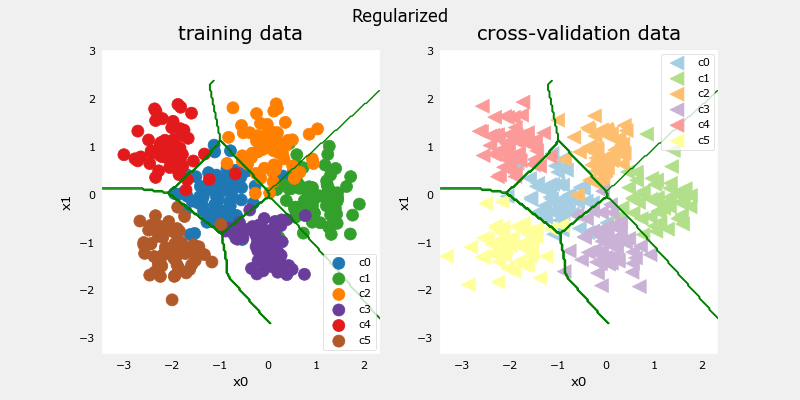

In [39]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [40]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 3ms/step
categorization error, training, regularized: 0.072, simple model, 0.058, complex model: 0.003
categorization error, cv,       regularized: 0.072, simple model, 0.087, complex model: 0.097


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [41]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0390
Epoch 2/1000
13/13 [==============================] - 0s 862us/step - loss: 0.4129
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3254
Epoch 4/1000
13/13 [==============================] - 0s 893us/step - loss: 0.2868
Epoch 5/1000
13/13 [==============================] - 0s 942us/step - loss: 0.2563
Epoch 6/1000
13/13 [==============================] - 0s 338us/step - loss: 0.2648
Epoch 7/1000
13/13 [==============================] - 0s 505us/step - loss: 0.2425
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2280
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2304
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2017
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2152
Epoch 12/1000
13/13 [==============================] - 0s 309us/step - loss: 0.2030
Epoch 13/1000

13/13 [==============================] - 0s 1ms/step - loss: 0.1732
Epoch 100/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1556
Epoch 101/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1681
Epoch 102/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1649
Epoch 103/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1855
Epoch 104/1000
13/13 [==============================] - 0s 198us/step - loss: 0.1653
Epoch 105/1000
13/13 [==============================] - 0s 541us/step - loss: 0.1504
Epoch 106/1000
13/13 [==============================] - 0s 618us/step - loss: 0.1495
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1500
Epoch 108/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1499
Epoch 109/1000
13/13 [==============================] - 0s 213us/step - loss: 0.1542
Epoch 110/1000
13/13 [==============================] - 0s 651us/step - loss: 0.1361
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.0982
Epoch 197/1000
13/13 [==============================] - 0s 192us/step - loss: 0.1090
Epoch 198/1000
13/13 [==============================] - 0s 767us/step - loss: 0.1154
Epoch 199/1000
13/13 [==============================] - 0s 225us/step - loss: 0.1240
Epoch 200/1000
13/13 [==============================] - 0s 740us/step - loss: 0.1216
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0980
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 203/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1129
Epoch 204/1000
13/13 [==============================] - 0s 918us/step - loss: 0.1153
Epoch 205/1000
13/13 [==============================] - 0s 537us/step - loss: 0.1145
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1416
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2021
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.0772
Epoch 294/1000
13/13 [==============================] - 0s 792us/step - loss: 0.0842
Epoch 295/1000
13/13 [==============================] - 0s 199us/step - loss: 0.0950
Epoch 296/1000
13/13 [==============================] - 0s 257us/step - loss: 0.0883
Epoch 297/1000
13/13 [==============================] - 0s 468us/step - loss: 0.0819
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0715
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0678
Epoch 300/1000
13/13 [==============================] - 0s 972us/step - loss: 0.0701
Epoch 301/1000
13/13 [==============================] - 0s 945us/step - loss: 0.0648
Epoch 302/1000
13/13 [==============================] - 0s 408us/step - loss: 0.0763
Epoch 303/1000
13/13 [==============================] - 0s 589us/step - loss: 0.0851
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0661
Epo

13/13 [==============================] - 0s 613us/step - loss: 0.0900
Epoch 391/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0841
Epoch 392/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0716
Epoch 393/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0710
Epoch 394/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0618
Epoch 395/1000
13/13 [==============================] - 0s 863us/step - loss: 0.0756
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0663
Epoch 397/1000
13/13 [==============================] - 0s 588us/step - loss: 0.0616
Epoch 398/1000
13/13 [==============================] - 0s 725us/step - loss: 0.0696
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0618
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0713
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0798
Epoch 402/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1906
Epoch 488/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1598
Epoch 490/1000
13/13 [==============================] - 0s 834us/step - loss: 0.1331
Epoch 491/1000
13/13 [==============================] - 0s 229us/step - loss: 0.1052
Epoch 492/1000
13/13 [==============================] - 0s 554us/step - loss: 0.0889
Epoch 493/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0788
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0736
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0683
Epoch 496/1000
13/13 [==============================] - 0s 849us/step - loss: 0.0609
Epoch 497/1000
13/13 [==============================] - 0s 243us/step - loss: 0.0569
Epoch 498/1000
13/13 [==============================] - 0s 553us/step - loss: 0.0625
Epoch 4

13/13 [==============================] - 0s 950us/step - loss: 0.0415
Epoch 585/1000
13/13 [==============================] - 0s 405us/step - loss: 0.0370
Epoch 586/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 587/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 588/1000
13/13 [==============================] - 0s 792us/step - loss: 0.0350
Epoch 589/1000
13/13 [==============================] - 0s 952us/step - loss: 0.0395
Epoch 590/1000
13/13 [==============================] - 0s 577us/step - loss: 0.0407
Epoch 591/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 593/1000
13/13 [==============================] - 0s 854us/step - loss: 0.0631
Epoch 594/1000
13/13 [==============================] - 0s 417us/step - loss: 0.0455
Epoch 595/1000
13/13 [==============================] - 0s 718us/step - loss: 0.0729
Epo

13/13 [==============================] - 0s 643us/step - loss: 0.0695
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1073
Epoch 683/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0884
Epoch 684/1000
13/13 [==============================] - 0s 923us/step - loss: 0.1117
Epoch 685/1000
13/13 [==============================] - 0s 203us/step - loss: 0.0799
Epoch 686/1000
13/13 [==============================] - 0s 664us/step - loss: 0.0492
Epoch 687/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0508
Epoch 688/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0533
Epoch 689/1000
13/13 [==============================] - 0s 792us/step - loss: 0.0439
Epoch 690/1000
13/13 [==============================] - 0s 265us/step - loss: 0.0391
Epoch 691/1000
13/13 [==============================] - 0s 568us/step - loss: 0.0373
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0339
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.0456
Epoch 779/1000
13/13 [==============================] - 0s 924us/step - loss: 0.0781
Epoch 780/1000
13/13 [==============================] - 0s 374us/step - loss: 0.0544
Epoch 781/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0424
Epoch 782/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0418
Epoch 783/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 785/1000
13/13 [==============================] - 0s 358us/step - loss: 0.0794
Epoch 786/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1863
Epoch 787/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 788/1000
13/13 [==============================] - 0s 834us/step - loss: 0.1358
Epoch 789/1000
13/13 [==============================] - 0s 936us/step - loss: 0.1375
Epoch 790

13/13 [==============================] - 0s 1ms/step - loss: 0.0830
Epoch 876/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0716
Epoch 877/1000
13/13 [==============================] - 0s 277us/step - loss: 0.0613
Epoch 878/1000
13/13 [==============================] - 0s 263us/step - loss: 0.0569
Epoch 879/1000
13/13 [==============================] - 0s 538us/step - loss: 0.0549
Epoch 880/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0524
Epoch 881/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0527
Epoch 882/1000
13/13 [==============================] - 0s 792us/step - loss: 0.0543
Epoch 883/1000
13/13 [==============================] - 0s 921us/step - loss: 0.0597
Epoch 884/1000
13/13 [==============================] - 0s 535us/step - loss: 0.0555
Epoch 885/1000
13/13 [==============================] - 0s 609us/step - loss: 0.0552
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0501
Epoch

13/13 [==============================] - 0s 259us/step - loss: 0.1226
Epoch 973/1000
13/13 [==============================] - 0s 733us/step - loss: 0.0981
Epoch 974/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0801
Epoch 975/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1699
Epoch 976/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1446
Epoch 977/1000
13/13 [==============================] - 0s 299us/step - loss: 0.1272
Epoch 978/1000
13/13 [==============================] - 0s 541us/step - loss: 0.0782
Epoch 979/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 980/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0599
Epoch 981/1000
13/13 [==============================] - 0s 786us/step - loss: 0.0419
Epoch 982/1000
13/13 [==============================] - 0s 261us/step - loss: 0.0420
Epoch 983/1000
13/13 [==============================] - 0s 654us/step - loss: 0.0522
Epo

13/13 [==============================] - 0s 675us/step - loss: 0.2417
Epoch 71/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2613
Epoch 72/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2315
Epoch 73/1000
13/13 [==============================] - 0s 792us/step - loss: 0.2446
Epoch 74/1000
13/13 [==============================] - 0s 922us/step - loss: 0.2506
Epoch 75/1000
13/13 [==============================] - 0s 641us/step - loss: 0.2438
Epoch 76/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2290
Epoch 77/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2395
Epoch 78/1000
13/13 [==============================] - 0s 852us/step - loss: 0.2318
Epoch 79/1000
13/13 [==============================] - 0s 972us/step - loss: 0.2395
Epoch 80/1000
13/13 [==============================] - 0s 592us/step - loss: 0.2436
Epoch 81/1000
13/13 [==============================] - 0s 682us/step - loss: 0.2514
Epoch 82/1000


13/13 [==============================] - 0s 1ms/step - loss: 0.2140
Epoch 168/1000
13/13 [==============================] - 0s 786us/step - loss: 0.2217
Epoch 169/1000
13/13 [==============================] - 0s 211us/step - loss: 0.2193
Epoch 170/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2301
Epoch 171/1000
13/13 [==============================] - 0s 691us/step - loss: 0.2112
Epoch 172/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2047
Epoch 173/1000
13/13 [==============================] - 0s 792us/step - loss: 0.2238
Epoch 174/1000
13/13 [==============================] - 0s 937us/step - loss: 0.2116
Epoch 175/1000
13/13 [==============================] - 0s 462us/step - loss: 0.2056
Epoch 176/1000
13/13 [==============================] - 0s 632us/step - loss: 0.2111
Epoch 177/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2100
Epoch 178/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2181
Epo

13/13 [==============================] - 0s 286us/step - loss: 0.1923
Epoch 265/1000
13/13 [==============================] - 0s 531us/step - loss: 0.1927
Epoch 266/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1940
Epoch 267/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1984
Epoch 268/1000
13/13 [==============================] - 0s 837us/step - loss: 0.1915
Epoch 269/1000
13/13 [==============================] - 0s 186us/step - loss: 0.1963
Epoch 270/1000
13/13 [==============================] - 0s 621us/step - loss: 0.1946
Epoch 271/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1944
Epoch 272/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1991
Epoch 273/1000
13/13 [==============================] - 0s 833us/step - loss: 0.2104
Epoch 274/1000
13/13 [==============================] - 0s 361us/step - loss: 0.2013
Epoch 275/1000
13/13 [==============================] - 0s 552us/step - loss: 0.2034
E

13/13 [==============================] - 0s 1ms/step - loss: 0.1852
Epoch 362/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2088
Epoch 363/1000
13/13 [==============================] - 0s 931us/step - loss: 0.1903
Epoch 364/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1914
Epoch 365/1000
13/13 [==============================] - 0s 698us/step - loss: 0.1939
Epoch 366/1000
13/13 [==============================] - 0s 779us/step - loss: 0.1928
Epoch 367/1000
13/13 [==============================] - 0s 866us/step - loss: 0.1895
Epoch 368/1000
13/13 [==============================] - 0s 869us/step - loss: 0.1821
Epoch 369/1000
13/13 [==============================] - 0s 874us/step - loss: 0.1814
Epoch 370/1000
13/13 [==============================] - 0s 956us/step - loss: 0.1906
Epoch 371/1000
13/13 [==============================] - 0s 849us/step - loss: 0.1793
Epoch 372/1000
13/13 [==============================] - 0s 339us/step - loss: 0.1815
E

13/13 [==============================] - 0s 1ms/step - loss: 0.1919
Epoch 459/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1936
Epoch 460/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1816
Epoch 461/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1849
Epoch 462/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1742
Epoch 463/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 464/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1765
Epoch 465/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1913
Epoch 466/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 467/1000
13/13 [==============================] - 0s 863us/step - loss: 0.1921
Epoch 468/1000
13/13 [==============================] - 0s 139us/step - loss: 0.1816
Epoch 469/1000
13/13 [==============================] - 0s 792us/step - loss: 0.1782
Epoch 470/100

13/13 [==============================] - 0s 627us/step - loss: 0.1731
Epoch 556/1000
13/13 [==============================] - 0s 622us/step - loss: 0.1758
Epoch 557/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1735
Epoch 558/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1661
Epoch 559/1000
13/13 [==============================] - 0s 793us/step - loss: 0.1832
Epoch 560/1000
13/13 [==============================] - 0s 177us/step - loss: 0.1846
Epoch 561/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1780
Epoch 562/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1733
Epoch 563/1000
13/13 [==============================] - 0s 844us/step - loss: 0.1715
Epoch 564/1000
13/13 [==============================] - 0s 835us/step - loss: 0.1665
Epoch 565/1000
13/13 [==============================] - 0s 943us/step - loss: 0.1678
Epoch 566/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1761
E

13/13 [==============================] - 0s 957us/step - loss: 0.1608
Epoch 653/1000
13/13 [==============================] - 0s 410us/step - loss: 0.1636
Epoch 654/1000
13/13 [==============================] - 0s 449us/step - loss: 0.1717
Epoch 655/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1677
Epoch 656/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1622
Epoch 657/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1695
Epoch 658/1000
13/13 [==============================] - 0s 859us/step - loss: 0.1705
Epoch 659/1000
13/13 [==============================] - 0s 267us/step - loss: 0.1676
Epoch 660/1000
13/13 [==============================] - 0s 954us/step - loss: 0.1729
Epoch 661/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1630
Epoch 662/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1716
Epoch 663/1000
13/13 [==============================] - 0s 833us/step - loss: 0.1635
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.1598
Epoch 750/1000
13/13 [==============================] - 0s 996us/step - loss: 0.1748
Epoch 751/1000
13/13 [==============================] - 0s 348us/step - loss: 0.1690
Epoch 752/1000
13/13 [==============================] - 0s 412us/step - loss: 0.1645
Epoch 753/1000
13/13 [==============================] - 0s 535us/step - loss: 0.1609
Epoch 754/1000
13/13 [==============================] - 0s 906us/step - loss: 0.1759
Epoch 755/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1650
Epoch 756/1000
13/13 [==============================] - 0s 854us/step - loss: 0.1667
Epoch 757/1000
13/13 [==============================] - 0s 218us/step - loss: 0.1648
Epoch 758/1000
13/13 [==============================] - 0s 656us/step - loss: 0.1609
Epoch 759/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1562
Epoch 760/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1656
Epo

13/13 [==============================] - 0s 958us/step - loss: 0.1638
Epoch 847/1000
13/13 [==============================] - 0s 411us/step - loss: 0.1620
Epoch 848/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1640
Epoch 849/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 850/1000
13/13 [==============================] - 0s 836us/step - loss: 0.1604
Epoch 851/1000
13/13 [==============================] - 0s 953us/step - loss: 0.1631
Epoch 852/1000
13/13 [==============================] - 0s 462us/step - loss: 0.1765
Epoch 853/1000
13/13 [==============================] - 0s 509us/step - loss: 0.1612
Epoch 854/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 855/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 856/1000
13/13 [==============================] - 0s 858us/step - loss: 0.1599
Epoch 857/1000
13/13 [==============================] - 0s 908us/step - loss: 0.1628
Epo

13/13 [==============================] - 0s 792us/step - loss: 0.1573
Epoch 944/1000
13/13 [==============================] - 0s 343us/step - loss: 0.1710
Epoch 945/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1581
Epoch 946/1000
13/13 [==============================] - 0s 811us/step - loss: 0.1681
Epoch 947/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1590
Epoch 948/1000
13/13 [==============================] - 0s 834us/step - loss: 0.1760
Epoch 949/1000
13/13 [==============================] - 0s 949us/step - loss: 0.1576
Epoch 950/1000
13/13 [==============================] - 0s 272us/step - loss: 0.1532
Epoch 951/1000
13/13 [==============================] - 0s 541us/step - loss: 0.1602
Epoch 952/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 953/1000
13/13 [==============================] - 0s 794us/step - loss: 0.1611
Epoch 954/1000
13/13 [==============================] - 0s 833us/step - loss: 0.1625

13/13 [==============================] - 0s 1ms/step - loss: 0.3249
Epoch 41/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3458
Epoch 42/1000
13/13 [==============================] - 0s 919us/step - loss: 0.3557
Epoch 43/1000
13/13 [==============================] - 0s 251us/step - loss: 0.3639
Epoch 44/1000
13/13 [==============================] - 0s 512us/step - loss: 0.3452
Epoch 45/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3395
Epoch 46/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3309
Epoch 47/1000
13/13 [==============================] - 0s 971us/step - loss: 0.3400
Epoch 48/1000
13/13 [==============================] - 0s 208us/step - loss: 0.3387
Epoch 49/1000
13/13 [==============================] - 0s 540us/step - loss: 0.3290
Epoch 50/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3154
Epoch 51/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3152
Epoch 52/1000
13/1

13/13 [==============================] - 0s 567us/step - loss: 0.2905
Epoch 139/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3297
Epoch 140/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3146
Epoch 141/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2843
Epoch 142/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2772
Epoch 143/1000
13/13 [==============================] - 0s 984us/step - loss: 0.2803
Epoch 144/1000
13/13 [==============================] - 0s 243us/step - loss: 0.3044
Epoch 145/1000
13/13 [==============================] - 0s 620us/step - loss: 0.2868
Epoch 146/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2758
Epoch 147/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2925
Epoch 148/1000
13/13 [==============================] - 0s 751us/step - loss: 0.2685
Epoch 149/1000
13/13 [==============================] - 0s 295us/step - loss: 0.2706
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.2643
Epoch 236/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2622
Epoch 237/1000
13/13 [==============================] - 0s 937us/step - loss: 0.2622
Epoch 238/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3120
Epoch 239/1000
13/13 [==============================] - 0s 372us/step - loss: 0.2840
Epoch 240/1000
13/13 [==============================] - 0s 641us/step - loss: 0.2668
Epoch 241/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2541
Epoch 242/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2817
Epoch 243/1000
13/13 [==============================] - 0s 951us/step - loss: 0.2685
Epoch 244/1000
13/13 [==============================] - 0s 270us/step - loss: 0.2848
Epoch 245/1000
13/13 [==============================] - 0s 742us/step - loss: 0.2642
Epoch 246/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2657
Epoch

13/13 [==============================] - 0s 624us/step - loss: 0.2799
Epoch 333/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2595
Epoch 334/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2640
Epoch 335/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2571
Epoch 336/1000
13/13 [==============================] - 0s 834us/step - loss: 0.2767
Epoch 337/1000
13/13 [==============================] - 0s 934us/step - loss: 0.2677
Epoch 338/1000
13/13 [==============================] - 0s 260us/step - loss: 0.2618
Epoch 339/1000
13/13 [==============================] - 0s 560us/step - loss: 0.2514
Epoch 340/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2828
Epoch 341/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2692
Epoch 342/1000
13/13 [==============================] - 0s 830us/step - loss: 0.2742
Epoch 343/1000
13/13 [==============================] - 0s 186us/step - loss: 0.2565
Epoch

13/13 [==============================] - 0s 818us/step - loss: 0.2356
Epoch 430/1000
13/13 [==============================] - 0s 325us/step - loss: 0.2367
Epoch 431/1000
13/13 [==============================] - 0s 482us/step - loss: 0.2405
Epoch 432/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2408
Epoch 433/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2507
Epoch 434/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2521
Epoch 435/1000
13/13 [==============================] - 0s 855us/step - loss: 0.2467
Epoch 436/1000
13/13 [==============================] - 0s 295us/step - loss: 0.2677
Epoch 437/1000
13/13 [==============================] - 0s 529us/step - loss: 0.2623
Epoch 438/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2515
Epoch 439/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2439
Epoch 440/1000
13/13 [==============================] - 0s 792us/step - loss: 0.2448
Epoch

13/13 [==============================] - 0s 965us/step - loss: 0.2371
Epoch 527/1000
13/13 [==============================] - 0s 305us/step - loss: 0.2495
Epoch 528/1000
13/13 [==============================] - 0s 311us/step - loss: 0.2623
Epoch 529/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2718
Epoch 530/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2564
Epoch 531/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2409
Epoch 532/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2325
Epoch 533/1000
13/13 [==============================] - 0s 813us/step - loss: 0.2343
Epoch 534/1000
13/13 [==============================] - 0s 873us/step - loss: 0.2492
Epoch 535/1000
13/13 [==============================] - 0s 219us/step - loss: 0.2368
Epoch 536/1000
13/13 [==============================] - 0s 499us/step - loss: 0.2359
Epoch 537/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2567
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.2400
Epoch 624/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2348
Epoch 625/1000
13/13 [==============================] - 0s 839us/step - loss: 0.2356
Epoch 626/1000
13/13 [==============================] - 0s 951us/step - loss: 0.2449
Epoch 627/1000
13/13 [==============================] - 0s 491us/step - loss: 0.2327
Epoch 628/1000
13/13 [==============================] - 0s 520us/step - loss: 0.2341
Epoch 629/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2333
Epoch 630/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2325
Epoch 631/1000
13/13 [==============================] - 0s 833us/step - loss: 0.2330
Epoch 632/1000
13/13 [==============================] - 0s 301us/step - loss: 0.2374
Epoch 633/1000
13/13 [==============================] - 0s 573us/step - loss: 0.2429
Epoch 634/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2300
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.2278
Epoch 721/1000
13/13 [==============================] - 0s 986us/step - loss: 0.2375
Epoch 722/1000
13/13 [==============================] - 0s 938us/step - loss: 0.2273
Epoch 723/1000
13/13 [==============================] - 0s 350us/step - loss: 0.2357
Epoch 724/1000
13/13 [==============================] - 0s 558us/step - loss: 0.2299
Epoch 725/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2424
Epoch 726/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2290
Epoch 727/1000
13/13 [==============================] - 0s 836us/step - loss: 0.2448
Epoch 728/1000
13/13 [==============================] - 0s 205us/step - loss: 0.2488
Epoch 729/1000
13/13 [==============================] - 0s 489us/step - loss: 0.2328
Epoch 730/1000
13/13 [==============================] - 0s 707us/step - loss: 0.2296
Epoch 731/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2535
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.2363
Epoch 818/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2311
Epoch 819/1000
13/13 [==============================] - 0s 974us/step - loss: 0.2547
Epoch 820/1000
13/13 [==============================] - 0s 854us/step - loss: 0.2785
Epoch 821/1000
13/13 [==============================] - 0s 203us/step - loss: 0.2454
Epoch 822/1000
13/13 [==============================] - 0s 655us/step - loss: 0.2330
Epoch 823/1000
13/13 [==============================] - 0s 465us/step - loss: 0.2354
Epoch 824/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2467
Epoch 825/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2317
Epoch 826/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2243
Epoch 827/1000
13/13 [==============================] - 0s 833us/step - loss: 0.2265
Epoch 828/1000
13/13 [==============================] - 0s 911us/step - loss: 0.2444
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.2283
Epoch 915/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2246
Epoch 916/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2222
Epoch 917/1000
13/13 [==============================] - 0s 927us/step - loss: 0.2265
Epoch 918/1000
13/13 [==============================] - 0s 271us/step - loss: 0.2160
Epoch 919/1000
13/13 [==============================] - 0s 633us/step - loss: 0.2328
Epoch 920/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2409
Epoch 921/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2298
Epoch 922/1000
13/13 [==============================] - 0s 167us/step - loss: 0.2300
Epoch 923/1000
13/13 [==============================] - 0s 612us/step - loss: 0.2258
Epoch 924/1000
13/13 [==============================] - 0s 631us/step - loss: 0.2198
Epoch 925/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2211
Epoch 9

13/13 [==============================] - 0s 792us/step - loss: 0.6013
Epoch 12/1000
13/13 [==============================] - 0s 380us/step - loss: 0.6164
Epoch 13/1000
13/13 [==============================] - 0s 758us/step - loss: 0.6145
Epoch 14/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6238
Epoch 15/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5709
Epoch 16/1000
13/13 [==============================] - 0s 818us/step - loss: 0.6300
Epoch 17/1000
13/13 [==============================] - 0s 436us/step - loss: 0.5793
Epoch 18/1000
13/13 [==============================] - 0s 690us/step - loss: 0.5638
Epoch 19/1000
13/13 [==============================] - 0s 695us/step - loss: 0.5391
Epoch 20/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5042
Epoch 21/1000
13/13 [==============================] - 0s 832us/step - loss: 0.5201
Epoch 22/1000
13/13 [==============================] - 0s 985us/step - loss: 0.5278
Epoch 23/100

13/13 [==============================] - 0s 383us/step - loss: 0.3933
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3733
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3707
Epoch 113/1000
13/13 [==============================] - 0s 995us/step - loss: 0.3636
Epoch 114/1000
13/13 [==============================] - 0s 928us/step - loss: 0.3649
Epoch 115/1000
13/13 [==============================] - 0s 295us/step - loss: 0.3576
Epoch 116/1000
13/13 [==============================] - 0s 390us/step - loss: 0.3680
Epoch 117/1000
13/13 [==============================] - 0s 595us/step - loss: 0.3743
Epoch 118/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3673
Epoch 119/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3906
Epoch 120/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4133
Epoch 1

13/13 [==============================] - 0s 1ms/step - loss: 0.3474
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3494
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3492
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3616
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3454
Epoch 211/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3545
Epoch 212/1000
13/13 [==============================] - 0s 950us/step - loss: 0.3550
Epoch 213/1000
13/13 [==============================] - 0s 342us/step - loss: 0.3455
Epoch 214/1000
13/13 [==============================] - 0s 508us/step - loss: 0.3380
Epoch 215/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3342
Epoch 216/1000
13/13 [==============================] - 0s 834us/step - loss: 0.3461
Epoch 217/1000
13/13 [==============================] - 0s 822us/step - loss: 0.3347
Epoch 218

13/13 [==============================] - 0s 926us/step - loss: 0.3204
Epoch 304/1000
13/13 [==============================] - 0s 379us/step - loss: 0.3264
Epoch 305/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3347
Epoch 306/1000
13/13 [==============================] - 0s 488us/step - loss: 0.3305
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3317
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3390
Epoch 309/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3196
Epoch 310/1000
13/13 [==============================] - 0s 187us/step - loss: 0.3283
Epoch 311/1000
13/13 [==============================] - 0s 229us/step - loss: 0.3109
Epoch 312/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3132
Epoch 313/1000
13/13 [==============================] - 0s 818us/step - loss: 0.3404
Epoch 314/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3296
E

13/13 [==============================] - 0s 1ms/step - loss: 0.3166
Epoch 401/1000
13/13 [==============================] - 0s 114us/step - loss: 0.3141
Epoch 402/1000
13/13 [==============================] - 0s 385us/step - loss: 0.3117
Epoch 403/1000
13/13 [==============================] - 0s 494us/step - loss: 0.3118
Epoch 404/1000
13/13 [==============================] - 0s 591us/step - loss: 0.3156
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3116
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3134
Epoch 407/1000
13/13 [==============================] - 0s 285us/step - loss: 0.3146
Epoch 408/1000
13/13 [==============================] - 0s 318us/step - loss: 0.3128
Epoch 409/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3333
Epoch 410/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3163
Epoch 411/1000
13/13 [==============================] - 0s 946us/step - loss: 0.3467
Epo

13/13 [==============================] - 0s 425us/step - loss: 0.3257
Epoch 498/1000
13/13 [==============================] - 0s 570us/step - loss: 0.2989
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3031
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3258
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3220
Epoch 502/1000
13/13 [==============================] - 0s 860us/step - loss: 0.3192
Epoch 503/1000
13/13 [==============================] - 0s 244us/step - loss: 0.3324
Epoch 504/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3152
Epoch 505/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3040
Epoch 506/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3169
Epoch 507/1000
13/13 [==============================] - 0s 793us/step - loss: 0.3100
Epoch 508/1000
13/13 [==============================] - 0s 300us/step - loss: 0.2973
Epoch

13/13 [==============================] - 0s 517us/step - loss: 0.2998
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4072
Epoch 596/1000
13/13 [==============================] - 0s 976us/step - loss: 0.3896
Epoch 597/1000
13/13 [==============================] - 0s 852us/step - loss: 0.3407
Epoch 598/1000
13/13 [==============================] - 0s 412us/step - loss: 0.3167
Epoch 599/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3165
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3110
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2969
Epoch 602/1000
13/13 [==============================] - 0s 339us/step - loss: 0.2970
Epoch 603/1000
13/13 [==============================] - 0s 555us/step - loss: 0.3282
Epoch 604/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3222
Epoch 605/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3367
Epoch

13/13 [==============================] - 0s 304us/step - loss: 0.3033
Epoch 692/1000
13/13 [==============================] - 0s 514us/step - loss: 0.2962
Epoch 693/1000
13/13 [==============================] - 0s 461us/step - loss: 0.3017
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3059
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2974
Epoch 696/1000
13/13 [==============================] - 0s 854us/step - loss: 0.2986
Epoch 697/1000
13/13 [==============================] - 0s 300us/step - loss: 0.2960
Epoch 698/1000
13/13 [==============================] - 0s 605us/step - loss: 0.3098
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2979
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3055
Epoch 701/1000
13/13 [==============================] - 0s 909us/step - loss: 0.2892
Epoch 702/1000
13/13 [==============================] - 0s 411us/step - loss: 0.2892
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.3132
Epoch 789/1000
13/13 [==============================] - 0s 446us/step - loss: 0.3070
Epoch 790/1000
13/13 [==============================] - 0s 335us/step - loss: 0.2976
Epoch 791/1000
13/13 [==============================] - 0s 317us/step - loss: 0.3368
Epoch 792/1000
13/13 [==============================] - 0s 706us/step - loss: 0.3192
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3251
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3391
Epoch 795/1000
13/13 [==============================] - 0s 933us/step - loss: 0.2996
Epoch 796/1000
13/13 [==============================] - 0s 389us/step - loss: 0.3252
Epoch 797/1000
13/13 [==============================] - 0s 615us/step - loss: 0.2931
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3384
Epoch 799/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3253
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.3217
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2999
Epoch 887/1000
13/13 [==============================] - 0s 243us/step - loss: 0.2820
Epoch 888/1000
13/13 [==============================] - 0s 243us/step - loss: 0.3022
Epoch 889/1000
13/13 [==============================] - 0s 588us/step - loss: 0.2883
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3097
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3042
Epoch 892/1000
13/13 [==============================] - 0s 843us/step - loss: 0.2947
Epoch 893/1000
13/13 [==============================] - 0s 440us/step - loss: 0.3133
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3194
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3366
Epoch 896/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3153
Epoch 8

13/13 [==============================] - 0s 430us/step - loss: 0.2869
Epoch 983/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2820
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2935
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3050
Epoch 986/1000
13/13 [==============================] - 0s 860us/step - loss: 0.2954
Epoch 987/1000
13/13 [==============================] - 0s 245us/step - loss: 0.2805
Epoch 988/1000
13/13 [==============================] - 0s 678us/step - loss: 0.2855
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2934
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2990
Epoch 991/1000
13/13 [==============================] - 0s 860us/step - loss: 0.2997
Epoch 992/1000
13/13 [==============================] - 0s 232us/step - loss: 0.3282
Epoch 993/1000
13/13 [==============================] - 0s 746us/step - loss: 0.3047
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.5048
Epoch 81/1000
13/13 [==============================] - 0s 921us/step - loss: 0.5458
Epoch 82/1000
13/13 [==============================] - 0s 273us/step - loss: 0.4966
Epoch 83/1000
13/13 [==============================] - 0s 453us/step - loss: 0.4938
Epoch 84/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4700
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4874
Epoch 86/1000
13/13 [==============================] - 0s 837us/step - loss: 0.4801
Epoch 87/1000
13/13 [==============================] - 0s 258us/step - loss: 0.4975
Epoch 88/1000
13/13 [==============================] - 0s 675us/step - loss: 0.4801
Epoch 89/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4810
Epoch 90/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4718
Epoch 91/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4674
Epoch 92/1000
13

13/13 [==============================] - 0s 585us/step - loss: 0.4335
Epoch 178/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4314
Epoch 179/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4329
Epoch 180/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4279
Epoch 181/1000
13/13 [==============================] - 0s 792us/step - loss: 0.4396
Epoch 182/1000
13/13 [==============================] - 0s 518us/step - loss: 0.4272
Epoch 183/1000
13/13 [==============================] - 0s 520us/step - loss: 0.4157
Epoch 184/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4110
Epoch 185/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4119
Epoch 186/1000
13/13 [==============================] - 0s 167us/step - loss: 0.4157
Epoch 187/1000
13/13 [==============================] - 0s 257us/step - loss: 0.4158
Epoch 188/1000
13/13 [==============================] - 0s 547us/step - loss: 0.4231
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.3819
Epoch 275/1000
13/13 [==============================] - 0s 928us/step - loss: 0.3928
Epoch 276/1000
13/13 [==============================] - 0s 472us/step - loss: 0.3889
Epoch 277/1000
13/13 [==============================] - 0s 459us/step - loss: 0.3868
Epoch 278/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3830
Epoch 279/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4042
Epoch 280/1000
13/13 [==============================] - 0s 922us/step - loss: 0.3970
Epoch 281/1000
13/13 [==============================] - 0s 377us/step - loss: 0.3778
Epoch 282/1000
13/13 [==============================] - 0s 498us/step - loss: 0.3816
Epoch 283/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 284/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3860
Epoch 285/1000
13/13 [==============================] - 0s 946us/step - loss: 0.4087
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.3626
Epoch 372/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3616
Epoch 373/1000
13/13 [==============================] - 0s 845us/step - loss: 0.3795
Epoch 374/1000
13/13 [==============================] - 0s 943us/step - loss: 0.3579
Epoch 375/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3823
Epoch 376/1000
13/13 [==============================] - 0s 898us/step - loss: 0.3801
Epoch 377/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3622
Epoch 378/1000
13/13 [==============================] - 0s 783us/step - loss: 0.3766
Epoch 379/1000
13/13 [==============================] - 0s 250us/step - loss: 0.3835
Epoch 380/1000
13/13 [==============================] - 0s 538us/step - loss: 0.3813
Epoch 381/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4115
Epoch 382/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3736
Epoch 3

13/13 [==============================] - 0s 1ms/step - loss: 0.4027
Epoch 469/1000
13/13 [==============================] - 0s 922us/step - loss: 0.4121
Epoch 470/1000
13/13 [==============================] - 0s 200us/step - loss: 0.3466
Epoch 471/1000
13/13 [==============================] - 0s 344us/step - loss: 0.3691
Epoch 472/1000
13/13 [==============================] - 0s 612us/step - loss: 0.4130
Epoch 473/1000
13/13 [==============================] - 0s 804us/step - loss: 0.4094
Epoch 474/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3995
Epoch 475/1000
13/13 [==============================] - 0s 866us/step - loss: 0.3735
Epoch 476/1000
13/13 [==============================] - 0s 325us/step - loss: 0.3626
Epoch 477/1000
13/13 [==============================] - 0s 657us/step - loss: 0.3836
Epoch 478/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3672
Epoch 479/1000
13/13 [==============================] - 0s 875us/step - loss: 0.3625

13/13 [==============================] - 0s 1ms/step - loss: 0.3457
Epoch 566/1000
13/13 [==============================] - 0s 989us/step - loss: 0.3611
Epoch 567/1000
13/13 [==============================] - 0s 923us/step - loss: 0.3443
Epoch 568/1000
13/13 [==============================] - 0s 776us/step - loss: 0.3489
Epoch 569/1000
13/13 [==============================] - 0s 417us/step - loss: 0.3488
Epoch 570/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 571/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3656
Epoch 572/1000
13/13 [==============================] - 0s 833us/step - loss: 0.3501
Epoch 573/1000
13/13 [==============================] - 0s 288us/step - loss: 0.3475
Epoch 574/1000
13/13 [==============================] - 0s 544us/step - loss: 0.3621
Epoch 575/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3453
Epoch 576/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3396
Epoch

13/13 [==============================] - 0s 240us/step - loss: 0.3515
Epoch 663/1000
13/13 [==============================] - 0s 283us/step - loss: 0.3876
Epoch 664/1000
13/13 [==============================] - 0s 562us/step - loss: 0.3572
Epoch 665/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3547
Epoch 666/1000
13/13 [==============================] - 0s 751us/step - loss: 0.3522
Epoch 667/1000
13/13 [==============================] - 0s 183us/step - loss: 0.3368
Epoch 668/1000
13/13 [==============================] - 0s 515us/step - loss: 0.3312
Epoch 669/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3634
Epoch 670/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3671
Epoch 671/1000
13/13 [==============================] - 0s 836us/step - loss: 0.3578
Epoch 672/1000
13/13 [==============================] - 0s 304us/step - loss: 0.3794
Epoch 673/1000
13/13 [==============================] - 0s 658us/step - loss: 0.4097

13/13 [==============================] - 0s 1ms/step - loss: 0.3390
Epoch 760/1000
13/13 [==============================] - 0s 944us/step - loss: 0.3502
Epoch 761/1000
13/13 [==============================] - 0s 361us/step - loss: 0.3550
Epoch 762/1000
13/13 [==============================] - 0s 541us/step - loss: 0.3518
Epoch 763/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3346
Epoch 764/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3536
Epoch 765/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 766/1000
13/13 [==============================] - 0s 861us/step - loss: 0.3435
Epoch 767/1000
13/13 [==============================] - 0s 619us/step - loss: 0.3401
Epoch 768/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3608
Epoch 769/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3449
Epoch 770/1000
13/13 [==============================] - 0s 836us/step - loss: 0.3315
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.3374
Epoch 857/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3282
Epoch 858/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3543
Epoch 859/1000
13/13 [==============================] - 0s 854us/step - loss: 0.3837
Epoch 860/1000
13/13 [==============================] - 0s 446us/step - loss: 0.3327
Epoch 861/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3649
Epoch 862/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3325
Epoch 863/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3231
Epoch 864/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3751
Epoch 865/1000
13/13 [==============================] - 0s 250us/step - loss: 0.3845
Epoch 866/1000
13/13 [==============================] - 0s 255us/step - loss: 0.3769
Epoch 867/1000
13/13 [==============================] - 0s 702us/step - loss: 0.3345
Epoch 8

13/13 [==============================] - 0s 1ms/step - loss: 0.3399
Epoch 954/1000
13/13 [==============================] - 0s 832us/step - loss: 0.3556
Epoch 955/1000
13/13 [==============================] - 0s 398us/step - loss: 0.3200
Epoch 956/1000
13/13 [==============================] - 0s 431us/step - loss: 0.3448
Epoch 957/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3319
Epoch 958/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3315
Epoch 959/1000
13/13 [==============================] - 0s 936us/step - loss: 0.3144
Epoch 960/1000
13/13 [==============================] - 0s 455us/step - loss: 0.3227
Epoch 961/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3262
Epoch 962/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3190
Epoch 963/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3425
Epoch 964/1000
13/13 [==============================] - 0s 929us/step - loss: 0.3204
Epoch

Epoch 51/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7017
Epoch 52/1000
13/13 [==============================] - 0s 995us/step - loss: 0.6786
Epoch 53/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6772
Epoch 54/1000
13/13 [==============================] - 0s 872us/step - loss: 0.6660
Epoch 55/1000
13/13 [==============================] - 0s 375us/step - loss: 0.7115
Epoch 56/1000
13/13 [==============================] - 0s 351us/step - loss: 0.6661
Epoch 57/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6651
Epoch 58/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6553
Epoch 59/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6744
Epoch 60/1000
13/13 [==============================] - 0s 941us/step - loss: 0.6648
Epoch 61/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7005
Epoch 62/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6733
Epoch 

Epoch 149/1000
13/13 [==============================] - 0s 564us/step - loss: 0.5358
Epoch 150/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5339
Epoch 151/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5233
Epoch 152/1000
13/13 [==============================] - 0s 867us/step - loss: 0.5315
Epoch 153/1000
13/13 [==============================] - 0s 351us/step - loss: 0.5352
Epoch 154/1000
13/13 [==============================] - 0s 594us/step - loss: 0.5274
Epoch 155/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5341
Epoch 156/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5288
Epoch 157/1000
13/13 [==============================] - 0s 921us/step - loss: 0.5340
Epoch 158/1000
13/13 [==============================] - 0s 308us/step - loss: 0.5260
Epoch 159/1000
13/13 [==============================] - 0s 631us/step - loss: 0.5163
Epoch 160/1000
13/13 [==============================] - 0s 1ms/step - los

13/13 [==============================] - 0s 550us/step - loss: 0.4825
Epoch 247/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4649
Epoch 248/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4787
Epoch 249/1000
13/13 [==============================] - 0s 792us/step - loss: 0.4786
Epoch 250/1000
13/13 [==============================] - 0s 274us/step - loss: 0.4735
Epoch 251/1000
13/13 [==============================] - 0s 499us/step - loss: 0.5056
Epoch 252/1000
13/13 [==============================] - 0s 665us/step - loss: 0.4852
Epoch 253/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4725
Epoch 254/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4934
Epoch 255/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4818
Epoch 256/1000
13/13 [==============================] - 0s 856us/step - loss: 0.4694
Epoch 257/1000
13/13 [==============================] - 0s 333us/step - loss: 0.4825
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.4321
Epoch 344/1000
13/13 [==============================] - 0s 973us/step - loss: 0.4319
Epoch 345/1000
13/13 [==============================] - 0s 293us/step - loss: 0.4287
Epoch 346/1000
13/13 [==============================] - 0s 490us/step - loss: 0.4313
Epoch 347/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4464
Epoch 348/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4712
Epoch 349/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4553
Epoch 350/1000
13/13 [==============================] - 0s 166us/step - loss: 0.4771
Epoch 351/1000
13/13 [==============================] - 0s 330us/step - loss: 0.4359
Epoch 352/1000
13/13 [==============================] - 0s 597us/step - loss: 0.4536
Epoch 353/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4422
Epoch 354/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 3

13/13 [==============================] - 0s 937us/step - loss: 0.4097
Epoch 441/1000
13/13 [==============================] - 0s 275us/step - loss: 0.4201
Epoch 442/1000
13/13 [==============================] - 0s 637us/step - loss: 0.4380
Epoch 443/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 444/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4430
Epoch 445/1000
13/13 [==============================] - 0s 834us/step - loss: 0.4551
Epoch 446/1000
13/13 [==============================] - 0s 257us/step - loss: 0.4581
Epoch 447/1000
13/13 [==============================] - 0s 536us/step - loss: 0.4470
Epoch 448/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4228
Epoch 449/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4124
Epoch 450/1000
13/13 [==============================] - 0s 953us/step - loss: 0.4133
Epoch 451/1000
13/13 [==============================] - 0s 572us/step - loss: 0.4120
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.4464
Epoch 538/1000
13/13 [==============================] - 0s 961us/step - loss: 0.4086
Epoch 539/1000
13/13 [==============================] - 0s 167us/step - loss: 0.4081
Epoch 540/1000
13/13 [==============================] - 0s 268us/step - loss: 0.4382
Epoch 541/1000
13/13 [==============================] - 0s 595us/step - loss: 0.4756
Epoch 542/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4339
Epoch 543/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4251
Epoch 544/1000
13/13 [==============================] - 0s 944us/step - loss: 0.4227
Epoch 545/1000
13/13 [==============================] - 0s 411us/step - loss: 0.3960
Epoch 546/1000
13/13 [==============================] - 0s 544us/step - loss: 0.4012
Epoch 547/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 548/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4028
Epoch

13/13 [==============================] - 0s 605us/step - loss: 0.4160
Epoch 635/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4037
Epoch 636/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4208
Epoch 637/1000
13/13 [==============================] - 0s 792us/step - loss: 0.4015
Epoch 638/1000
13/13 [==============================] - 0s 285us/step - loss: 0.3949
Epoch 639/1000
13/13 [==============================] - 0s 604us/step - loss: 0.3895
Epoch 640/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4134
Epoch 641/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3949
Epoch 642/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4136
Epoch 643/1000
13/13 [==============================] - 0s 851us/step - loss: 0.4229
Epoch 644/1000
13/13 [==============================] - 0s 275us/step - loss: 0.3974
Epoch 645/1000
13/13 [==============================] - 0s 549us/step - loss: 0.4409
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 732/1000
13/13 [==============================] - 0s 958us/step - loss: 0.3970
Epoch 733/1000
13/13 [==============================] - 0s 252us/step - loss: 0.3901
Epoch 734/1000
13/13 [==============================] - 0s 355us/step - loss: 0.3945
Epoch 735/1000
13/13 [==============================] - 0s 486us/step - loss: 0.3702
Epoch 736/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3811
Epoch 737/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4050
Epoch 738/1000
13/13 [==============================] - 0s 936us/step - loss: 0.4105
Epoch 739/1000
13/13 [==============================] - 0s 352us/step - loss: 0.4210
Epoch 740/1000
13/13 [==============================] - 0s 540us/step - loss: 0.4017
Epoch 741/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4030
Epoch 742/1000
13/13 [==============================] - 0s 793us/step - loss: 0.4292
Epo

13/13 [==============================] - 0s 604us/step - loss: 0.3815
Epoch 829/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4008
Epoch 830/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4480
Epoch 831/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3880
Epoch 832/1000
13/13 [==============================] - 0s 199us/step - loss: 0.3824
Epoch 833/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3787
Epoch 834/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3870
Epoch 835/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3763
Epoch 836/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3742
Epoch 837/1000
13/13 [==============================] - 0s 922us/step - loss: 0.3728
Epoch 838/1000
13/13 [==============================] - 0s 360us/step - loss: 0.3862
Epoch 839/1000
13/13 [==============================] - 0s 548us/step - loss: 0.3793
Epoch 8

13/13 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 926/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3764
Epoch 927/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3966
Epoch 928/1000
13/13 [==============================] - 0s 792us/step - loss: 0.3710
Epoch 929/1000
13/13 [==============================] - 0s 208us/step - loss: 0.3612
Epoch 930/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4222
Epoch 931/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4860
Epoch 932/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4530
Epoch 933/1000
13/13 [==============================] - 0s 834us/step - loss: 0.3815
Epoch 934/1000
13/13 [==============================] - 0s 215us/step - loss: 0.3948
Epoch 935/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3875
Epoch 936/1000
13/13 [==============================] - 0s 570us/step - loss: 0.3780
Epoch

13/13 [==============================] - 0s 305us/step - loss: 0.9834
Epoch 23/1000
13/13 [==============================] - 0s 495us/step - loss: 0.9764
Epoch 24/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9479
Epoch 25/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9268
Epoch 26/1000
13/13 [==============================] - 0s 834us/step - loss: 1.0282
Epoch 27/1000
13/13 [==============================] - 0s 271us/step - loss: 0.9742
Epoch 28/1000
13/13 [==============================] - 0s 508us/step - loss: 0.9370
Epoch 29/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9153
Epoch 30/1000
13/13 [==============================] - 0s 980us/step - loss: 0.9456
Epoch 31/1000
13/13 [==============================] - 0s 873us/step - loss: 0.9208
Epoch 32/1000
13/13 [==============================] - 0s 293us/step - loss: 0.9128
Epoch 33/1000
13/13 [==============================] - 0s 572us/step - loss: 0.9055
Epoch 34/100

13/13 [==============================] - 0s 1ms/step - loss: 0.6473
Epoch 121/1000
13/13 [==============================] - 0s 970us/step - loss: 0.6423
Epoch 122/1000
13/13 [==============================] - 0s 308us/step - loss: 0.6449
Epoch 123/1000
13/13 [==============================] - 0s 320us/step - loss: 0.6354
Epoch 124/1000
13/13 [==============================] - 0s 614us/step - loss: 0.6406
Epoch 125/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6237
Epoch 126/1000
13/13 [==============================] - 0s 833us/step - loss: 0.6314
Epoch 127/1000
13/13 [==============================] - 0s 202us/step - loss: 0.6416
Epoch 128/1000
13/13 [==============================] - 0s 543us/step - loss: 0.6166
Epoch 129/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6216
Epoch 130/1000
13/13 [==============================] - 0s 919us/step - loss: 0.6155
Epoch 131/1000
13/13 [==============================] - 0s 862us/step - loss: 0.6322
E

13/13 [==============================] - 0s 276us/step - loss: 0.5614
Epoch 218/1000
13/13 [==============================] - 0s 381us/step - loss: 0.5574
Epoch 219/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5637
Epoch 220/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5437
Epoch 221/1000
13/13 [==============================] - 0s 834us/step - loss: 0.5401
Epoch 222/1000
13/13 [==============================] - 0s 875us/step - loss: 0.5567
Epoch 223/1000
13/13 [==============================] - 0s 417us/step - loss: 0.5610
Epoch 224/1000
13/13 [==============================] - 0s 779us/step - loss: 0.5571
Epoch 225/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5431
Epoch 226/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5744
Epoch 227/1000
13/13 [==============================] - 0s 792us/step - loss: 0.5699
Epoch 228/1000
13/13 [==============================] - 0s 213us/step - loss: 0.5477
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.5193
Epoch 315/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5092
Epoch 316/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5009
Epoch 317/1000
13/13 [==============================] - 0s 992us/step - loss: 0.5030
Epoch 318/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4993
Epoch 319/1000
13/13 [==============================] - 0s 405us/step - loss: 0.4978
Epoch 320/1000
13/13 [==============================] - 0s 640us/step - loss: 0.5170
Epoch 321/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5210
Epoch 322/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5383
Epoch 323/1000
13/13 [==============================] - 0s 930us/step - loss: 0.5524
Epoch 324/1000
13/13 [==============================] - 0s 407us/step - loss: 0.5870
Epoch 325/1000
13/13 [==============================] - 0s 608us/step - loss: 0.5609
Epoch 3

13/13 [==============================] - 0s 986us/step - loss: 0.5118
Epoch 412/1000
13/13 [==============================] - 0s 159us/step - loss: 0.4774
Epoch 413/1000
13/13 [==============================] - 0s 387us/step - loss: 0.4869
Epoch 414/1000
13/13 [==============================] - 0s 838us/step - loss: 0.5074
Epoch 415/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5390
Epoch 416/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4761
Epoch 417/1000
13/13 [==============================] - 0s 939us/step - loss: 0.5006
Epoch 418/1000
13/13 [==============================] - 0s 436us/step - loss: 0.4800
Epoch 419/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4806
Epoch 420/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4683
Epoch 421/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4885
Epoch 422/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4954
Epoch 4

13/13 [==============================] - 0s 456us/step - loss: 0.4720
Epoch 509/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4614
Epoch 510/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4538
Epoch 511/1000
13/13 [==============================] - 0s 840us/step - loss: 0.4723
Epoch 512/1000
13/13 [==============================] - 0s 241us/step - loss: 0.4608
Epoch 513/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4624
Epoch 514/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4691
Epoch 515/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4662
Epoch 516/1000
13/13 [==============================] - 0s 817us/step - loss: 0.4582
Epoch 517/1000
13/13 [==============================] - 0s 366us/step - loss: 0.4536
Epoch 518/1000
13/13 [==============================] - 0s 562us/step - loss: 0.4502
Epoch 519/1000
13/13 [==============================] - 0s 887us/step - loss: 0.4615
Epo

13/13 [==============================] - 0s 1ms/step - loss: 0.4532
Epoch 606/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4776
Epoch 607/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4657
Epoch 608/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4737
Epoch 609/1000
13/13 [==============================] - 0s 833us/step - loss: 0.4409
Epoch 610/1000
13/13 [==============================] - 0s 330us/step - loss: 0.4694
Epoch 611/1000
13/13 [==============================] - 0s 364us/step - loss: 0.4448
Epoch 612/1000
13/13 [==============================] - 0s 562us/step - loss: 0.4668
Epoch 613/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4422
Epoch 614/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4442
Epoch 615/1000
13/13 [==============================] - 0s 869us/step - loss: 0.4593
Epoch 616/1000
13/13 [==============================] - 0s 285us/step - loss: 0.4990
Epoch 6

13/13 [==============================] - 0s 1ms/step - loss: 0.4347
Epoch 703/1000
13/13 [==============================] - 0s 893us/step - loss: 0.4233
Epoch 704/1000
13/13 [==============================] - 0s 208us/step - loss: 0.4455
Epoch 705/1000
13/13 [==============================] - 0s 369us/step - loss: 0.4405
Epoch 706/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4442
Epoch 707/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4587
Epoch 708/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4528
Epoch 709/1000
13/13 [==============================] - 0s 945us/step - loss: 0.4625
Epoch 710/1000
13/13 [==============================] - 0s 713us/step - loss: 0.4821
Epoch 711/1000
13/13 [==============================] - 0s 657us/step - loss: 0.4393
Epoch 712/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4740
Epoch 713/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4487
Epoch 7

13/13 [==============================] - 0s 1ms/step - loss: 0.4288
Epoch 800/1000
13/13 [==============================] - 0s 915us/step - loss: 0.4262
Epoch 801/1000
13/13 [==============================] - 0s 236us/step - loss: 0.4142
Epoch 802/1000
13/13 [==============================] - 0s 431us/step - loss: 0.4101
Epoch 803/1000
13/13 [==============================] - 0s 474us/step - loss: 0.4089
Epoch 804/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4056
Epoch 805/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4177
Epoch 806/1000
13/13 [==============================] - 0s 921us/step - loss: 0.4242
Epoch 807/1000
13/13 [==============================] - 0s 938us/step - loss: 0.4111
Epoch 808/1000
13/13 [==============================] - 0s 649us/step - loss: 0.4329
Epoch 809/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4666
Epoch 810/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4191
Epoch

13/13 [==============================] - 0s 970us/step - loss: 0.4253
Epoch 897/1000
13/13 [==============================] - 0s 234us/step - loss: 0.4162
Epoch 898/1000
13/13 [==============================] - 0s 392us/step - loss: 0.4265
Epoch 899/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4270
Epoch 900/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4221
Epoch 901/1000
13/13 [==============================] - 0s 833us/step - loss: 0.4263
Epoch 902/1000
13/13 [==============================] - 0s 948us/step - loss: 0.4205
Epoch 903/1000
13/13 [==============================] - 0s 339us/step - loss: 0.4325
Epoch 904/1000
13/13 [==============================] - 0s 560us/step - loss: 0.4028
Epoch 905/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4126
Epoch 906/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4243
Epoch 907/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4282
Epoch

13/13 [==============================] - 0s 352us/step - loss: 0.4080
Epoch 994/1000
13/13 [==============================] - 0s 599us/step - loss: 0.4461
Epoch 995/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4202
Epoch 996/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4037
Epoch 997/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4321
Epoch 998/1000
13/13 [==============================] - 0s 975us/step - loss: 0.4070
Epoch 999/1000
13/13 [==============================] - 0s 405us/step - loss: 0.4244
Epoch 1000/1000
13/13 [==============================] - 0s 633us/step - loss: 0.4572
Finished lambda = 0.3


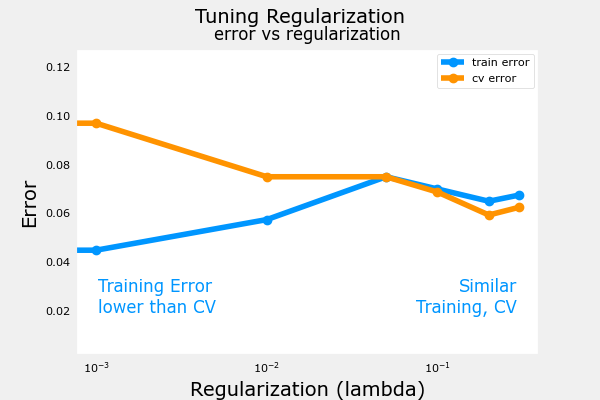

In [42]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 2ms/step


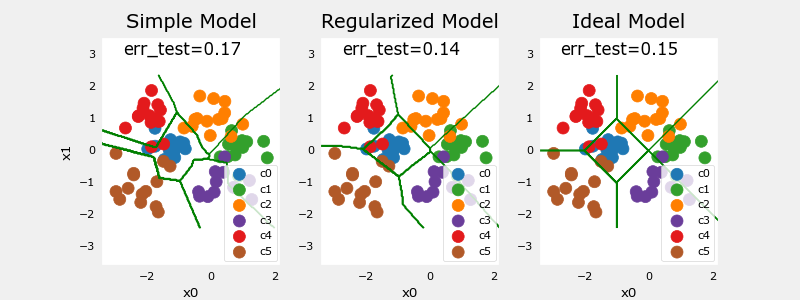

In [43]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)